In [65]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../simulation_results/realization_1.csv')

df.head()

,Time,AgentID,AgentType,PosX,PosY,Radius
0,0.0,0,ZOMBIE,-0.206672,3.047151,0.5
1,0.0,1,HUMAN,-3.507661,6.428167,1.5
2,0.0,2,HUMAN,3.093494,8.982221,0.5
3,0.0,3,HUMAN,3.114086,-4.851686,0.5
4,0.0,4,HUMAN,-2.447868,-1.196903,0.5


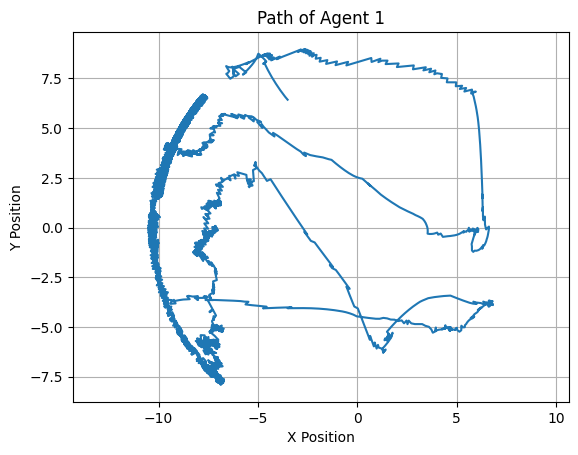

In [66]:
df_filtered = df[df['AgentID'] == 1]
plt.plot(df_filtered['PosX'], df_filtered['PosY'])
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Path of Agent 1')
plt.axis('equal')
plt.grid(True)
plt.show()

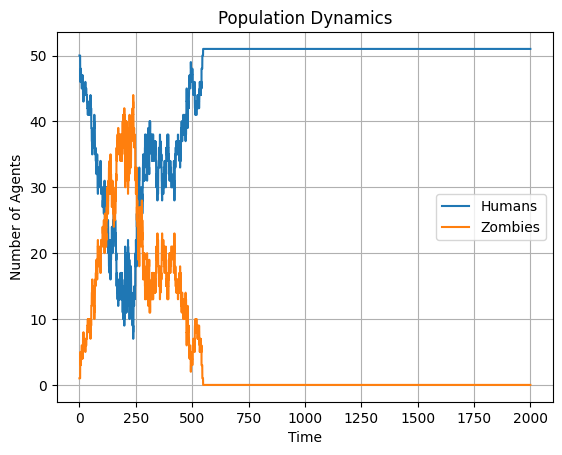

In [67]:
# Plot the percentage of humans and zombies over time
agent_counts = df.groupby(['Time', 'AgentType']).size().unstack(fill_value=0)

plt.plot(agent_counts.index, agent_counts['HUMAN'], label='Humans')
plt.plot(agent_counts.index, agent_counts['ZOMBIE'], label='Zombies')
plt.xlabel('Time')
plt.ylabel('Number of Agents')
plt.title('Population Dynamics')
plt.legend()
plt.grid(True)
plt.show()